# Day-47 Seasonal Decomposition,ACF& PACF Analysis

Yesterday, we learned to use Exponential Smoothing, and before that, ARIMA. But how do you know what parameters to feed these models? You don't just guess! Today, we're diving into the three core diagnostic tools that help you select the p,d,q values for ARIMA and understand the periodicity of your data: Lag Plots, Autocorrelation (ACF), and Partial Autocorrelation (PACF).

## Topics Covered:

- Seasonal Decomposition
- Lag Plots
- ACF
- PACF

## Seasonal Decomposition: Breaking Down the Series

Seasonal Decomposition is the process of breaking a time series down into its three main components: Trend, Seasonality, and Residual (Noise). We briefly touched on this before, but it's a vital diagnostic tool.

### How it Works:

It uses a technique (like Moving Averages or STL) to estimate and separate the components based on either an Additive 
$(Y_t =T_t + S_t +R_t)$ 
or Multiplicative $(Y_t = T_t× S_t × R_t)$ relationship.

`Analogy`: The Engineer's Blueprint. Decomposition is like taking a complex machine apart to inspect its core functions. You can clearly see the long-term upward movement (Trend), the predictable, repeating pattern (Seasonality), and what's left over (Noise).

### What to Look For:



- Confirming Seasonality: If the Seasonality component plot shows a clear, non-zero wave, you confirm the need for a seasonal model (like SARIMA or Holt-Winters).

- Inspecting Trend: The isolated Trend component helps you see the underlying growth or decline without the seasonal noise.

- Checking Residuals: The Residual component should look like white noise (random scattering around zero) for a well-behaved series.

## Lag Plots: Uncovering Immediate Correlation

A Lag Plot shows the relationship between a time series variable and a lagged (or prior) version of itself.

### How it Works:

 It plots $Y_t$(the current value) on the Y-axis against $Y_{t−1}$(the value from the previous period) on the X-axis.
 You can create a plot for any lag, $Y_t$ vs. $Y_{t−k}$.

`Analogy`: The Weather Report. Imagine plotting today's temperature against yesterday's temperature. If the dots cluster along a straight diagonal line, it means today's temperature is strongly correlated with yesterday's. If the dots are scattered, there's no immediate, simple relationship.

### What to Look For:

- Strong Linear Pattern: Indicates strong autocorrelation and a high likelihood that an AR term is needed in your model.

- Circular/Elliptical Pattern: Often indicates the presence of seasonality.

## Autocorrelation (ACF): The Full Story

Autocorrelation measures the correlation between the series at time t and the series at time t−k (the lag). The ACF Plot shows this correlation for every possible lag, k.

### How it Works:


The ACF line plot starts at lag 0 (which is always 1) and shows how the correlation decays as the lag increases. The correlation at lag 12 tells you how much the current observation is influenced by the observation 12 periods ago.

`Analogy`: Ripples in a Pond. If you drop a stone in a pond, the first ripple is strong, but each subsequent ripple gets weaker. ACF is like measuring the strength of all those ripples.

### What to Look For:

- Slow Decay: Indicates a Trend in the data (non-stationarity).

- Significant Spikes at Specific Lags (e.g., 12, 24): Confirms Seasonality (use these lags for the seasonal component of a SARIMA model).

- Sharp Cut-off after Lag q: Suggests an MA(q) term is appropriate for your ARIMA model.

## Partial Autocorrelation (PACF): The Direct Link

Partial Autocorrelation measures the correlation between the series at time t and the series at time t−k, after removing the influence of all the intermediate lags (t−1,t−2,…,t−k+1).

### How it Works:

PACF isolates the direct link. If lag 2 is correlated with lag 0 only because lag 1 is correlated with both, the PACF for lag 2 will be zero (or close to zero).

`Analogy`: The Gossip Chain. If Jane tells Bob a secret, and Bob tells Carol, Carol's knowledge is directly linked to Bob, but only indirectly to Jane. PACF strips away Bob's intermediate influence to see if Carol and Jane have any direct link outside the chain.

### What to Look For:

- Sharp Cut-off after Lag p: Suggests an AR(p) term is appropriate for your ARIMA model.

## Code Example: ACF and PACF Analysis

Here's how you generate these powerful plots using the statsmodels library to diagnose your time series:

C:\Users\amey9\AppData\Local\Temp\ipykernel_16904\24643105.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2020', periods=100, freq='M')


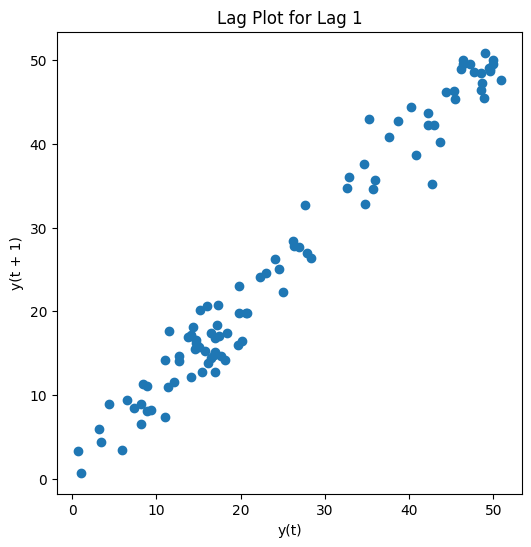

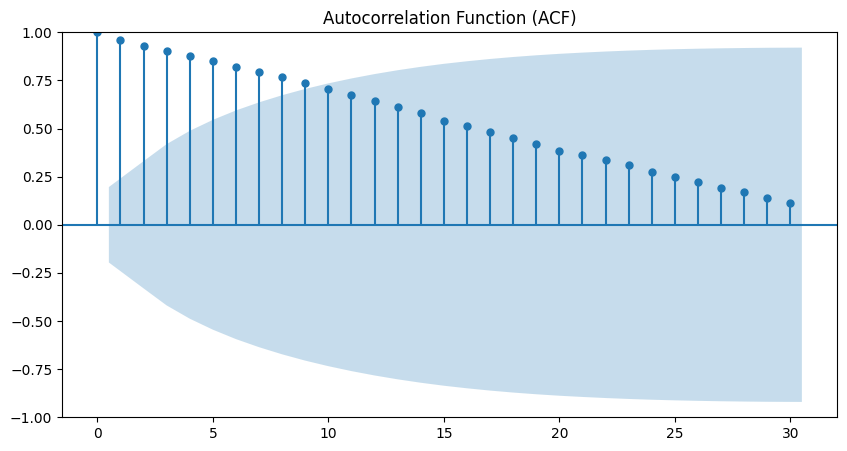

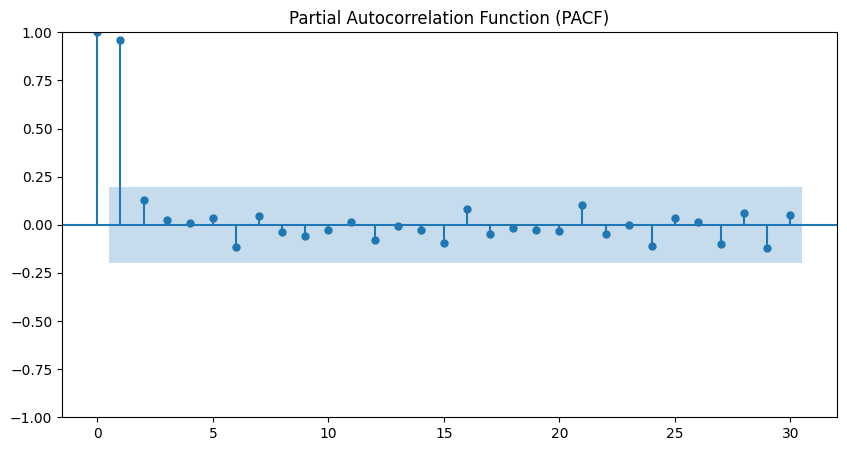

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot

# --- 1. Recreate/Load your Time Series ---
np.random.seed(42) 
index = pd.date_range(start='2020', periods=100, freq='M')
data = 5 * np.sin(np.linspace(0, 3*np.pi, 100)) + np.arange(100) * 0.5 + np.random.randn(100) * 2
ts = pd.Series(data, index=index)

# 2. Lag Plot (Check for a strong AR(1) relationship)
plt.figure(figsize=(6, 6))
lag_plot(ts, lag=1)
plt.title('Lag Plot for Lag 1')
plt.show()

# 3. ACF Plot
# Use this to determine the MA(q) order and Seasonality
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ts, lags=30, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# 4. PACF Plot
# Use this to determine the AR(p) order
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(ts, lags=30, ax=ax, method='ywm') # 'ywm' is often recommended for PACF
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Summary of Day 47

Today, you gained the three critical diagnostic tools for time series modeling. You now know that:

1. Lag Plots confirm immediate, linear dependence.

2. ACF identifies the MA(q) term and Seasonality (spikes at lag 12).

3. PACF identifies the AR(p) term.

This process of plotting and analysis is essential for building a statistically valid ARIMA model!

## What's Next (Day 48)

In the real world, models are judged by their performance. Tomorrow, on Day 48, we'll shift gears and dive into Time Series Evaluation Metrics. We'll cover:

- RMSE, MAE, and MAPE: Which metric is best for forecasting?

- Walk-Forward Validation: The only correct way to test a time series model (and why simple train/test splits are a disaster for time series). Get ready to rigorously test your forecasts!